1.Install and Import Dependencies

In [1]:
!pip install easyocr
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.9 MB 3.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.9 MB 2.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.9 MB 2.9 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.9 MB 3.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.9 MB 6.1 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.9 MB 6.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.9 MB 6.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.9 MB 6.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.9 MB 6.7 MB/s eta 0:00:01
   --------------


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ------------------- -------------------- 99.0/198.5 MB 2.5 MB/s eta 0:00:40
   -------------------- ------------------- 99.5/198.5 MB 2.5 MB/s eta 0:00:40
   -------------------- ------------------- 100.0/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- ------------------- 100.1/198.5 MB 2.7 MB/s eta 0:00:37
   -------------------- -----------------


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

2.Read in Image , Greyscale and Blur

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\TEMP\ipykernel_16744\4251514165.py:1: SyntaxWarning: invalid escape sequence '\P'
  img = cv2.imread('C:\Project\Code\image3.jpg')


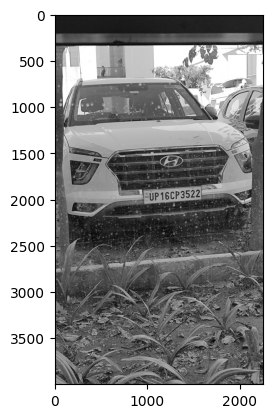

In [4]:
img = cv2.imread('C:\Project\Code\image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

3.Apply filter and find edges for localization

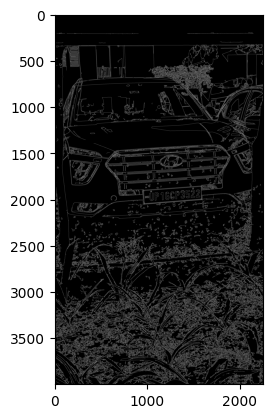

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  #noise reduction
edged = cv2.Canny(bfilter, 30, 200)  #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

4.Find Contours and Apply Mask

In [6]:
Keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(Keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [8]:
location

array([[[1580, 1870]],

       [[ 966, 1910]],

       [[ 965, 2044]],

       [[1575, 2003]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

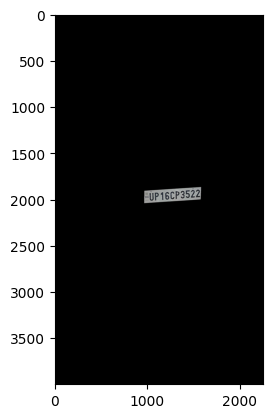

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

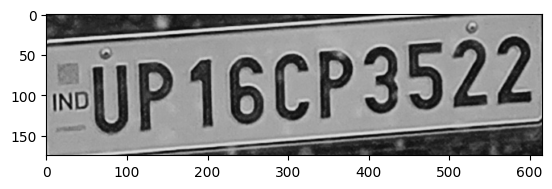

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

5.Use Easy OCR to read text

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[3, 89], [63, 89], [63, 127], [3, 127]], 'IND', 0.9998072222209795),
 ([[34, 3], [616, 3], [616, 171], [34, 171]],
  'UP1GCP3522',
  0.4921713363135992)]

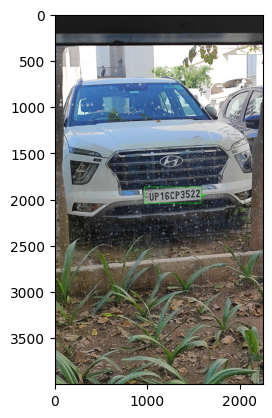

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()


In [16]:
# Open video file
video_file =  'C:\Project\Code\2103099-uhd_3840_2160_30fps.mp4' # Change this to the path of your input video file


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\TEMP\ipykernel_16744\402543654.py:2: SyntaxWarning: invalid escape sequence '\P'
  video_file =  'C:\Project\Code\2103099-uhd_3840_2160_30fps.mp4' # Change this to the path of your input video file


In [22]:
import cv2
import easyocr

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Load the pre-trained Haar cascade classifier for license plate detection
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

# Open video file
video_file = 'C:\Project\Code\2103099-uhd_3840_2160_30fps.mp4'  # Change this to the path of your input video file
cap = cv2.VideoCapture(video_file)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Function to detect and recognize license plates
def detect_and_recognize_plates(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect license plates
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in plates:
        # Draw rectangles around the detected plates
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Extract the plate region
        plate_roi = frame[y:y + h, x:x + w]
        
        # Use EasyOCR to recognize text from the plate region
        results = reader.readtext(plate_roi)
        
        # Display the recognized text
        for (bbox, text, prob) in results:
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return frame

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Detect and recognize license plates
    frame_with_plates = detect_and_recognize_plates(frame)
    
    # Write the frame with detected plates to the output video
    output_video.write(frame_with_plates)

# Release the capture and close the output video file
cap.release()
output_video.release()


<>:11: SyntaxWarning: invalid escape sequence '\P'
<>:11: SyntaxWarning: invalid escape sequence '\P'
C:\TEMP\ipykernel_16744\2523774677.py:11: SyntaxWarning: invalid escape sequence '\P'
  video_file = 'C:\Project\Code\2103099-uhd_3840_2160_30fps.mp4'  # Change this to the path of your input video file
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
